In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd

# Load the merged dataset
merged_file_path = "merged_dataset.csv"
df = pd.read_csv(merged_file_path)

# Split into train and test
train_df = df[df['Item_Outlet_Sales'].notna()]  # Rows where sales data is present
test_df = df[df['Item_Outlet_Sales'].isna()].drop(columns=['Item_Outlet_Sales'])  # Remove sales column for test data

# Save split datasets
train_df.to_csv("train.csv", index=False)
test_df.to_csv("test.csv", index=False)

print("Train and test datasets successfully split and saved!")

Train and test datasets successfully split and saved!


In [5]:
data = pd.read_csv('train.csv')

In [6]:
df = pd.read_csv('test.csv')

In [7]:
df.shape

(5681, 11)

In [8]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
data.shape

(8522, 12)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8522 entries, 0 to 8521
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8522 non-null   object 
 1   Item_Weight                7059 non-null   float64
 2   Item_Fat_Content           8522 non-null   object 
 3   Item_Visibility            8522 non-null   float64
 4   Item_Type                  8522 non-null   object 
 5   Item_MRP                   8522 non-null   float64
 6   Outlet_Identifier          8522 non-null   object 
 7   Outlet_Establishment_Year  8522 non-null   int64  
 8   Outlet_Size                6112 non-null   object 
 9   Outlet_Location_Type       8522 non-null   object 
 10  Outlet_Type                8522 non-null   object 
 11  Item_Outlet_Sales          8522 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [11]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
data.duplicated().sum()

0

# Filling Missing Value

In [13]:
# Numerical -> mean , Item_Weight
# Categorical-> mode, Outlet_Size

In [14]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [15]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [17]:
data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [18]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [19]:
mode_of_outlet_size = data.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc = lambda x : x.mode()[0])

In [20]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [21]:
missing_value = data['Outlet_Size'].isnull()

In [22]:
missing_value.value_counts()

Outlet_Size
False    6112
True     2410
Name: count, dtype: int64

In [23]:
missing_value = data['Outlet_Size'].isnull()
data.loc[missing_value, 'Outlet_Size'] = data.loc[missing_value, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [24]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [25]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000
mean,12.857370,0.066135,141.000471,1997.831964,2181.455027
std,4.226319,0.051600,62.274675,8.372247,1706.530835
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026988,93.844250,1987.000000,834.913200
50%,12.857370,0.053935,143.014100,1999.000000,1794.331000
75%,16.000000,0.094594,185.652250,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Exploratory Data Analysis

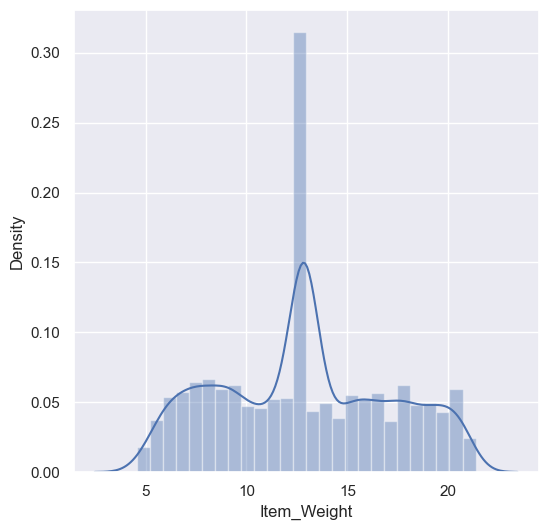

In [26]:
# Item_Weight Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Weight'])
plt.show()

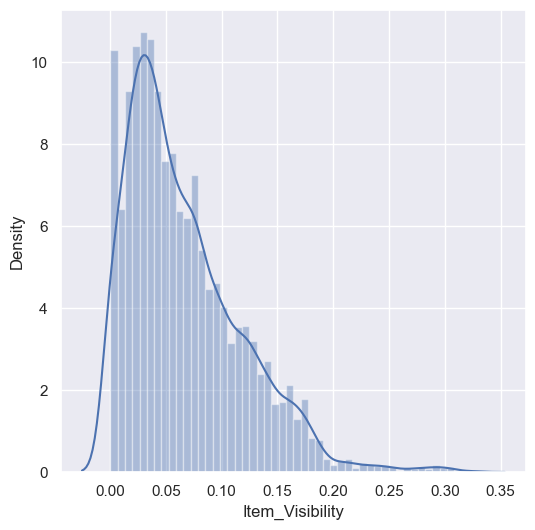

In [27]:
# Item_Visibility Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Visibility'])
plt.show()

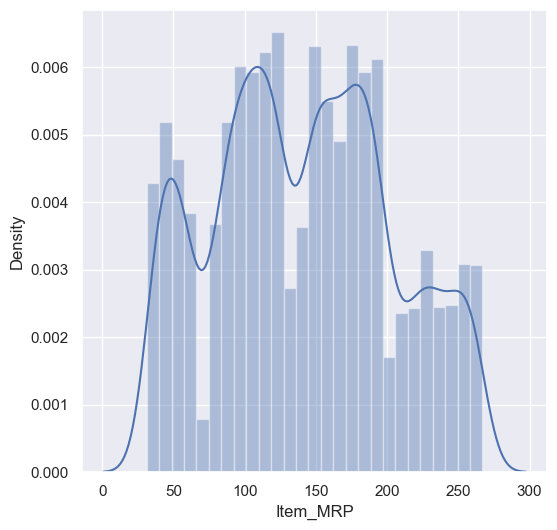

In [28]:
# Item_MRP Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['Item_MRP'])
plt.show()

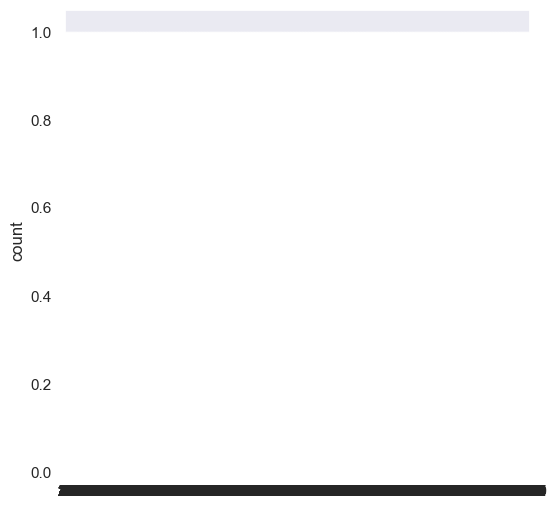

In [29]:
# Outlet_Establishment_Year Count
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(data['Outlet_Establishment_Year'])
plt.show()

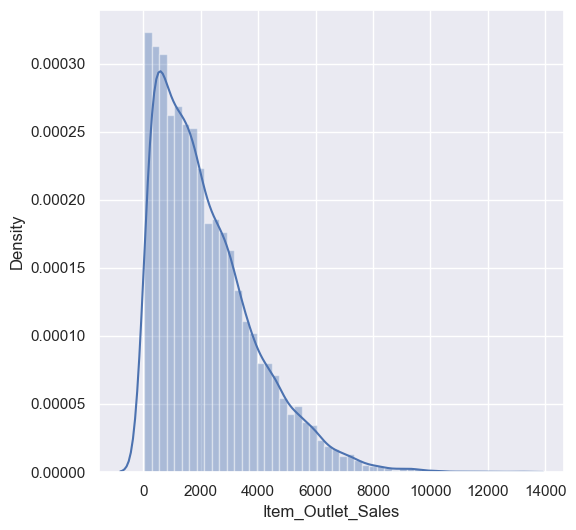

In [30]:
# Item_Outlet_Sales Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Outlet_Sales'])
plt.show()

In [31]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [32]:
data.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

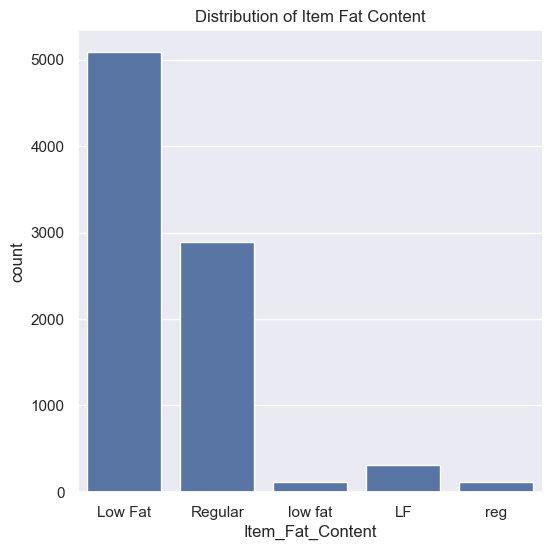

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.countplot(x=data['Item_Fat_Content'])
plt.title("Distribution of Item Fat Content")
plt.show()


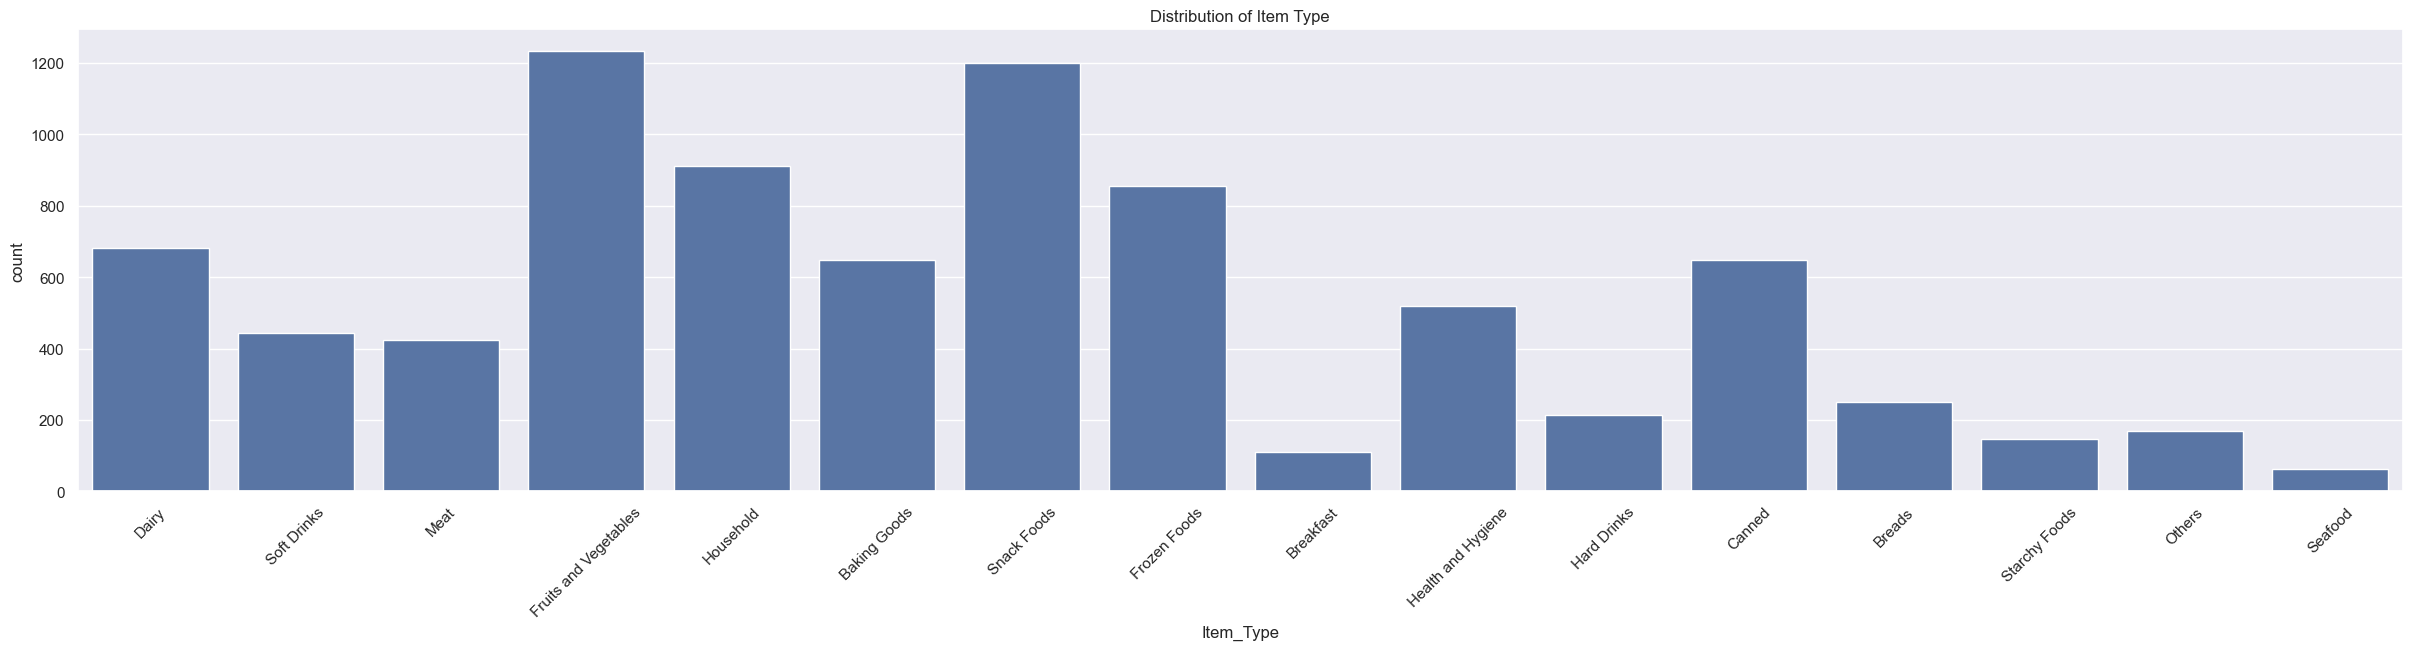

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 6))
sns.countplot(x=data['Item_Type'])
plt.title("Distribution of Item Type")
plt.xticks(rotation=45)
plt.show()


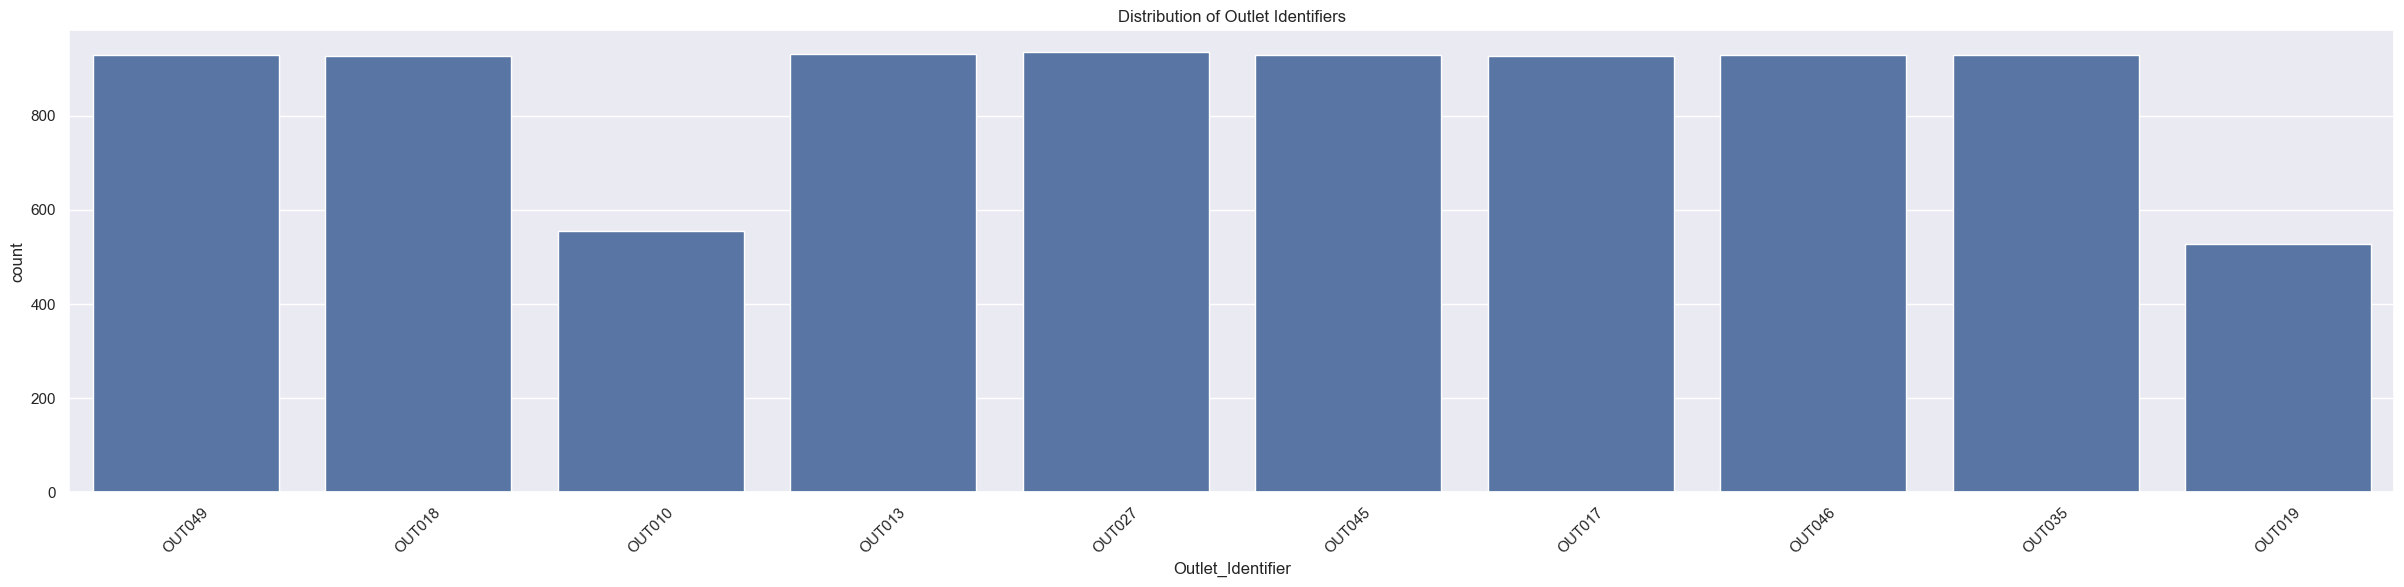

In [35]:
plt.figure(figsize=(30, 6))
sns.countplot(x=data['Outlet_Identifier'])
plt.title("Distribution of Outlet Identifiers")
plt.xticks(rotation=45)
plt.show()

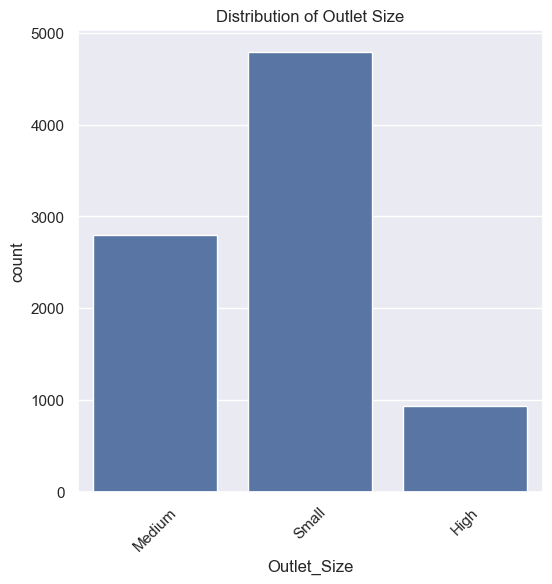

In [36]:
# Outlet_Size Count
plt.figure(figsize=(6,6))
sns.countplot(x=data['Outlet_Size'])
plt.title("Distribution of Outlet Size")
plt.xticks(rotation=45)
plt.show()

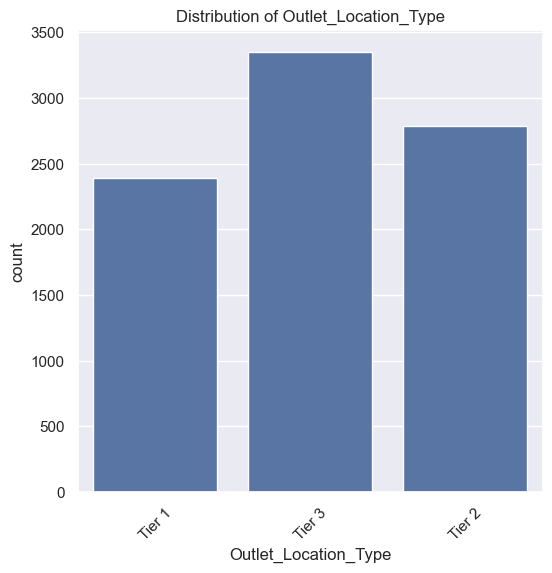

In [37]:
# Outlet_Location_Type Count
plt.figure(figsize=(6,6))
sns.countplot(x=data['Outlet_Location_Type'])
plt.title("Distribution of Outlet_Location_Type")
plt.xticks(rotation=45)
plt.show()

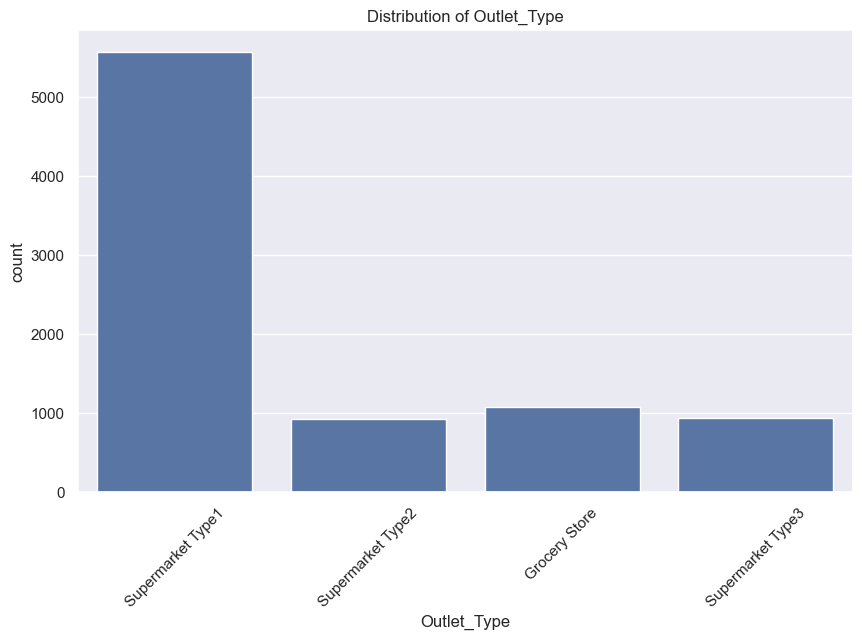

In [38]:
# Outlet_Type Count
plt.figure(figsize=(10,6))
sns.countplot(x=data['Outlet_Type'])
plt.title("Distribution of Outlet_Type")
plt.xticks(rotation=45)
plt.show()

In [39]:
data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg':'Regular'}}, inplace=True)

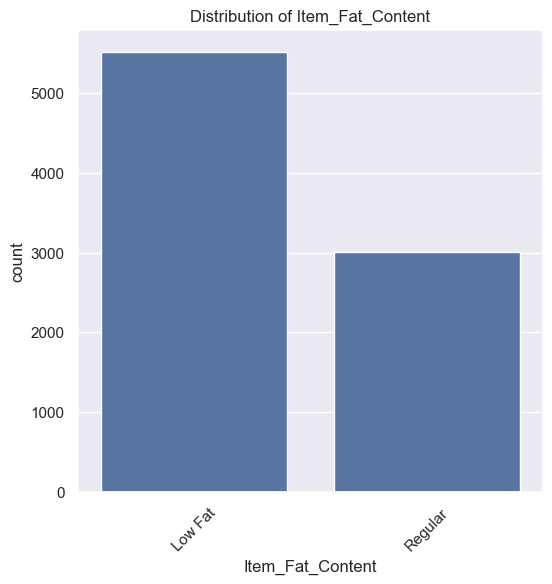

In [40]:
# Item_Fat_Content Count
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=data['Item_Fat_Content'])
plt.title("Distribution of Item_Fat_Content")
plt.xticks(rotation=45)
plt.show()

In [41]:
data.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

# Label Encoder

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [43]:
encoder = LabelEncoder()

In [44]:
data['Item_Identifier']  = encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content']  = encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type']  = encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier']  = encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size']  = encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type']  = encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type']  = encoder.fit_transform(data['Outlet_Type'])

In [45]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Spliting data into train & test part

In [46]:
X = data.drop(columns = 'Item_Outlet_Sales', axis = 1)
y = data['Item_Outlet_Sales']

In [47]:
X.shape

(8522, 11)

In [48]:
y.shape

(8522,)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [51]:
metrics.r2_score(y_test, y_pred)

0.5165527878383627

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8522 entries, 0 to 8521
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8522 non-null   int32  
 1   Item_Weight                8522 non-null   float64
 2   Item_Fat_Content           8522 non-null   int32  
 3   Item_Visibility            8522 non-null   float64
 4   Item_Type                  8522 non-null   int32  
 5   Item_MRP                   8522 non-null   float64
 6   Outlet_Identifier          8522 non-null   int32  
 7   Outlet_Establishment_Year  8522 non-null   int64  
 8   Outlet_Size                8522 non-null   int32  
 9   Outlet_Location_Type       8522 non-null   int32  
 10  Outlet_Type                8522 non-null   int32  
 11  Item_Outlet_Sales          8522 non-null   float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 566.0 KB


In [53]:
data.sample(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5024,1039,7.97,1,0.040216,10,90.4514,2,2007,2,1,1,1328.271
7269,1417,12.15,0,0.000000,11,123.7730,8,1997,2,0,1,3325.671
500,1374,12.15,0,0.000000,9,117.8150,2,2007,2,1,1,2330.300
2951,557,5.46,1,0.032308,3,185.2240,3,2009,1,2,2,2423.512


In [54]:
input1 = (743,18.600,0,0.039356,5,246.3802,9,1999,1,0,1)
new_input = np.asanyarray(input1, dtype = float)
prediction = model.predict(new_input.reshape(1, -1))
print(prediction)

[6364.159]


In [55]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
import pickle


# Handle Missing Values
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

# Correcting Inconsistent Categories
data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)

# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

categorical_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type',
                       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Splitting Data into Features and Target
X = data.drop(columns='Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaling for Linear & Polynomial Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Linear Regression
print("=== Linear Regression ===")
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_preds = linear_model.predict(X_test_scaled)
print("R2 Score:", r2_score(y_test, linear_preds))
print("MSE:", mean_squared_error(y_test, linear_preds))

# 2. Polynomial Regression
print("\n=== Polynomial Regression ===")
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_preds = poly_model.predict(X_test_poly)
print("R2 Score:", r2_score(y_test, poly_preds))
print("MSE:", mean_squared_error(y_test, poly_preds))

# 3. Ridge Regression
print("\n=== Ridge Regression ===")
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_preds = ridge_model.predict(X_test_scaled)
print("R2 Score:", r2_score(y_test, ridge_preds))
print("MSE:", mean_squared_error(y_test, ridge_preds))

# 4. Random Forest
print("\n=== Random Forest Regression ===")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("R2 Score:", r2_score(y_test, rf_preds))
print("MSE:", mean_squared_error(y_test, rf_preds))

# 5. Gradient Boosting Regression
print("\n=== Gradient Boosting Regression ===")
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
print("R2 Score:", r2_score(y_test, gb_preds))
print("MSE:", mean_squared_error(y_test, gb_preds))

# 6. CatBoost Regression
print("\n=== CatBoost Regression ===")
cat_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_state=42, verbose=0)
cat_model.fit(X_train, y_train)
cat_preds = cat_model.predict(X_test)
print("R2 Score:", r2_score(y_test, cat_preds))
print("MSE:", mean_squared_error(y_test, cat_preds))

# Save Models (Optional)
pickle.dump(linear_model, open('linear_model.pkl', 'wb'))
pickle.dump(poly_model, open('poly_model.pkl', 'wb'))
pickle.dump(ridge_model, open('ridge_model.pkl', 'wb'))
pickle.dump(rf_model, open('rf_model.pkl', 'wb'))
pickle.dump(gb_model, open('gb_model.pkl', 'wb'))
pickle.dump(cat_model, open('cat_model.pkl', 'wb'))
pickle.dump(poly_features, open('poly_features.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

=== Linear Regression ===
R2 Score: 0.49858637246391
MSE: 1449750.7953868369

=== Polynomial Regression ===
R2 Score: 0.5932934422447484
MSE: 1175921.6806533234

=== Ridge Regression ===
R2 Score: 0.4985905563307228
MSE: 1449738.698459457

=== Random Forest Regression ===
R2 Score: 0.5649182192779317
MSE: 1257963.7309812445

=== Gradient Boosting Regression ===
R2 Score: 0.6002593575484394
MSE: 1155780.9411569752

=== CatBoost Regression ===
R2 Score: 0.6061828245633101
MSE: 1138654.2606188837


In [57]:
!pip install holidays


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: D:\python\python.exe -m pip install --upgrade pip


# Chronological Insights

In [58]:
import pandas as pd
import numpy as np
import random

data['Outlet_Establishment_Year'] = pd.to_datetime(data['Outlet_Establishment_Year'], format='%Y')

# Extracting time-based features
data['Day_of_Week'] = data['Outlet_Establishment_Year'].dt.dayofweek
data['Month'] = data['Outlet_Establishment_Year'].dt.month
data['Quarter'] = data['Outlet_Establishment_Year'].dt.quarter
data['Year'] = data['Outlet_Establishment_Year'].dt.year

import holidays

# Example: create a column for holidays (USA as an example, adjust to your needs)
us_holidays = holidays.US(years=[1999, 2009, 1998, 2023,1987,2002,1985,2007,1997])

# Generate random holidays between 1st and 15th of each month for each year
random_holidays = []
for year in data['Year'].unique():
    # Generate 5 random holidays for each year, with dates between 1st and 15th
    holidays_for_year = [
        pd.Timestamp(f'{year}-{random.randint(1, 12)}-{random.randint(1, 15)}') 
        for _ in range(5)
    ]
    random_holidays.extend(holidays_for_year)

# Combine US holidays and random holidays
combined_holidays = list(us_holidays.keys()) + random_holidays

# Assign random holiday numbers (1-15) to the 'Holiday' column
data['Holiday'] = data['Outlet_Establishment_Year'].apply(
    lambda row: random.randint(9,20) if row.date() in combined_holidays else 0
)

# Display the updated dataframe
print(data[['Outlet_Establishment_Year', 'Day_of_Week','Month', 'Quarter', 'Holiday']].head(5))


  Outlet_Establishment_Year  Day_of_Week  Month  Quarter  Holiday
0                1999-01-01            4      1        1       12
1                2009-01-01            3      1        1       15
2                1999-01-01            4      1        1       16
3                1998-01-01            3      1        1       20
4                1987-01-01            3      1        1       15


Evaluation for Linear Regression:
R2 Score: 0.5190146804668323
RMSE: 1179.273452355341
MAE: 870.1073349842219
RRSE: 0.6935310515998312
Correlation Coefficient: 0.7205507312856954

Evaluation for Polynomial Regression:
R2 Score: 0.594523252517605
RMSE: 1082.7584665651088
MAE: 761.7574924340175
RRSE: 0.6367705610990468
Correlation Coefficient: 0.7712890241393602

Evaluation for Random Forest Regression:
R2 Score: 0.5682832237597769
RMSE: 1117.2441104909342
MAE: 777.6825627542523
RRSE: 0.6570515780669148
Correlation Coefficient: 0.7555471201601242

Evaluation for XGBoost Regression:
R2 Score: 0.5784273058986515
RMSE: 1104.0401003231536
MAE: 761.4542390409068
RRSE: 0.649286295944515
Correlation Coefficient: 0.7613360800714475

Evaluation for CatBoost Regression:
R2 Score: 0.6072903286258253
RMSE: 1065.5759494944396
MAE: 742.5501213946069
RRSE: 0.6266655179393348
Correlation Coefficient: 0.7792885084875353

Evaluation for Gradient Boosting Regression:
R2 Score: 0.5992517809931095
RMSE: 1076

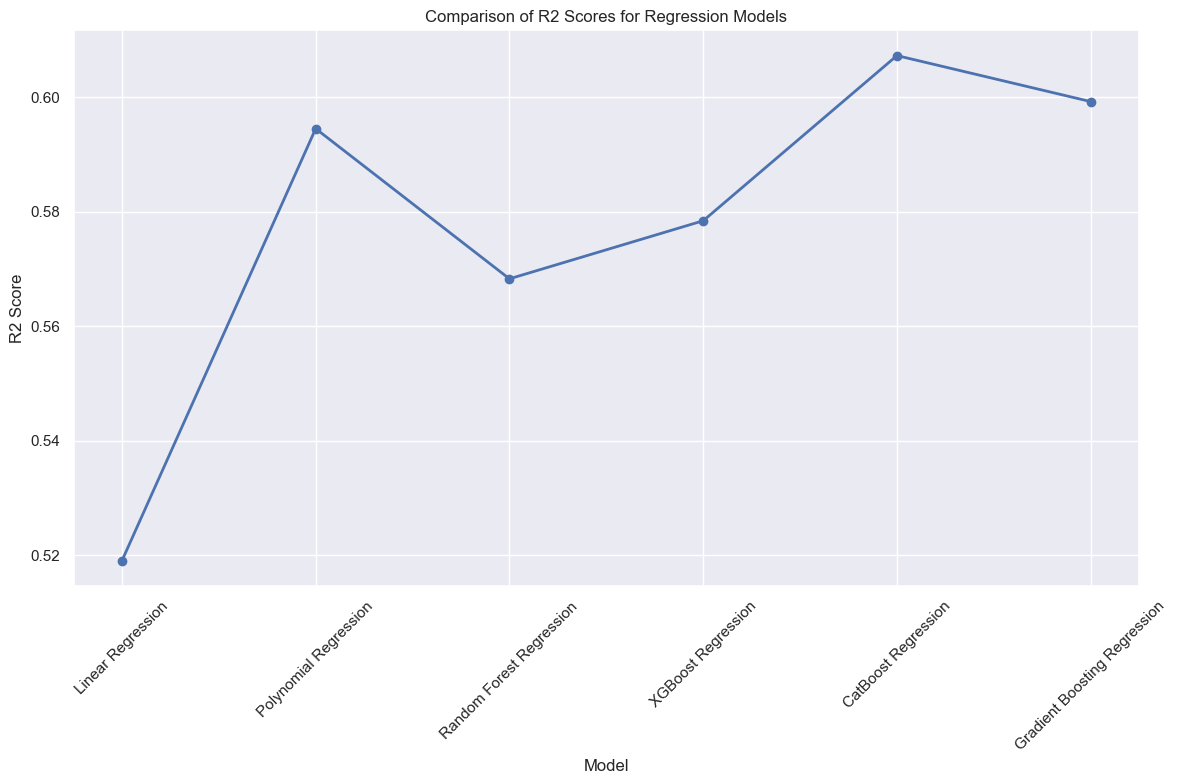

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Time-based features
time_features = ['Day_of_Week', 'Month', 'Quarter', 'Holiday']

# Assuming data is a pandas DataFrame
X = data.drop(columns=['Item_Outlet_Sales', 'Outlet_Establishment_Year'], axis=1)  # Exclude target and redundant features
X = X[time_features + [col for col in X.columns if col not in time_features]]  # Add time-based features
y = data['Item_Outlet_Sales']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training and predictions
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost Regression": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "CatBoost Regression": CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_state=42, verbose=0),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
}

# Polynomial features for Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Store predictions
predictions = {}

# Train and predict for each model
for model_name, model in models.items():
    if model_name == "Polynomial Regression":
        model.fit(X_train_poly, y_train)
        predictions[model_name] = model.predict(X_test_poly)
    else:
        model.fit(X_train_scaled, y_train)
        predictions[model_name] = model.predict(X_test_scaled)

# Store R2 scores for each model
r2_scores = {}

# Evaluate function
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    rrse = np.sqrt(np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    correlation = np.corrcoef(y_true, y_pred)[0, 1]
    
    print(f"Evaluation for {model_name}:")
    print(f"R2 Score: {r2}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"RRSE: {rrse}")
    print(f"Correlation Coefficient: {correlation}\n")
    
    # Store R2 scores for plotting
    r2_scores[model_name] = r2

# Evaluate all models
for model_name, y_pred in predictions.items():
    evaluate_model(y_test, y_pred, model_name)

# Plot R2 score comparison (Line Graph)
plt.figure(figsize=(12, 8))

# Plot R2 scores for each model
plt.plot(list(r2_scores.keys()), list(r2_scores.values()), marker='o', lw=2, color='b')

# Customize plot
plt.title('Comparison of R2 Scores for Regression Models')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
